## importing the required dependencies

In [1]:
import pandas as pd 
import pickle
import numpy as np 
import  matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
df.shape

(1599, 12)

## Visualization

<AxesSubplot:xlabel='quality', ylabel='count'>

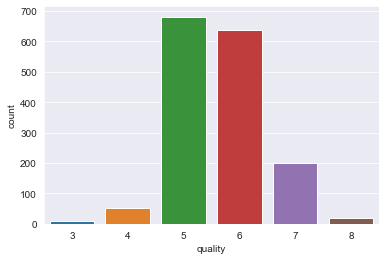

In [9]:
plt.figure(figsize=(6,4))
sns.set_style('darkgrid')
sns.countplot(x='quality',data=df)

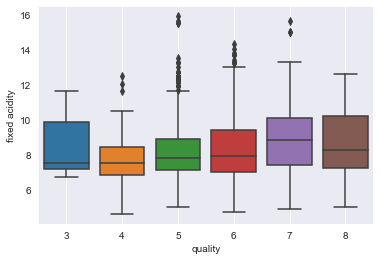

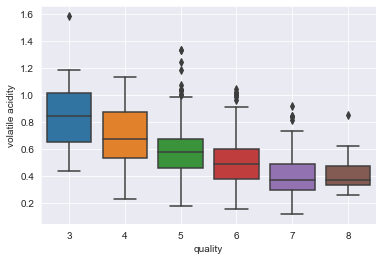

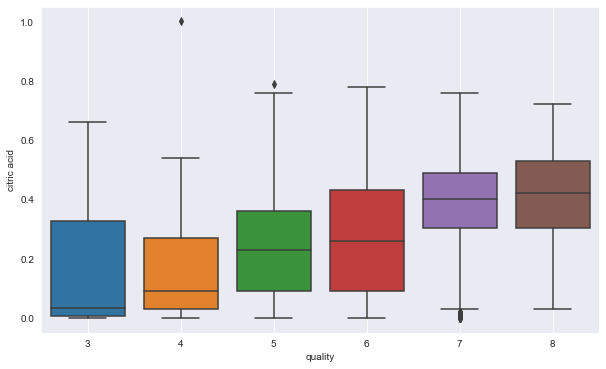

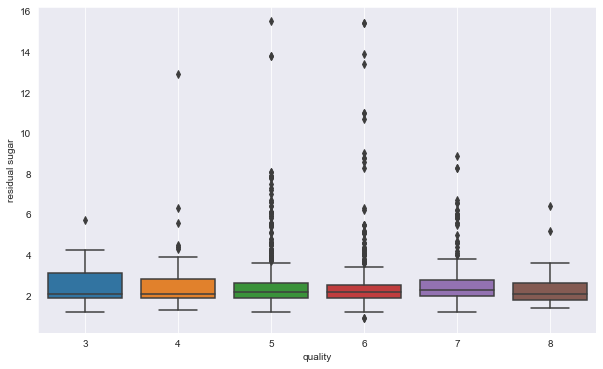

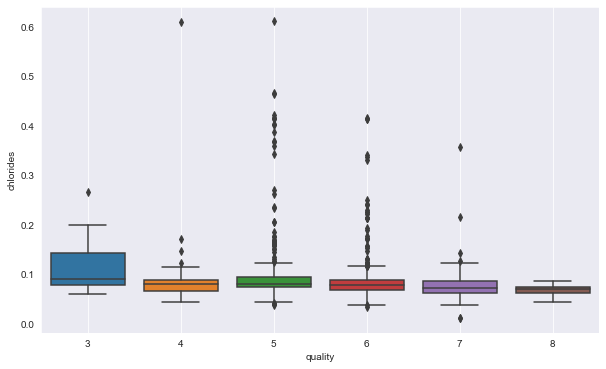

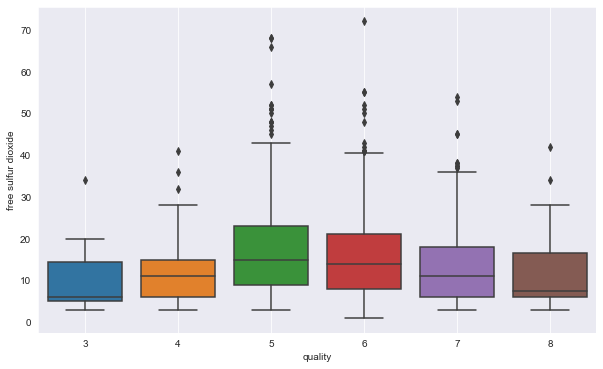

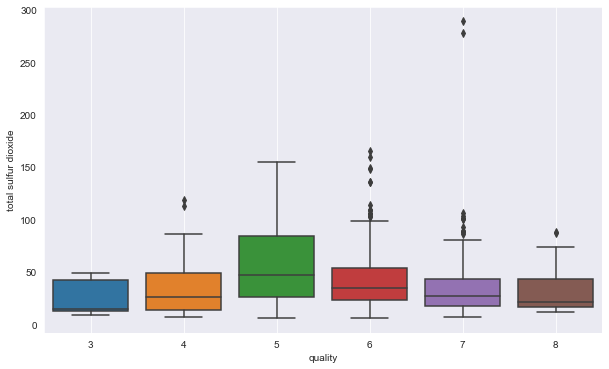

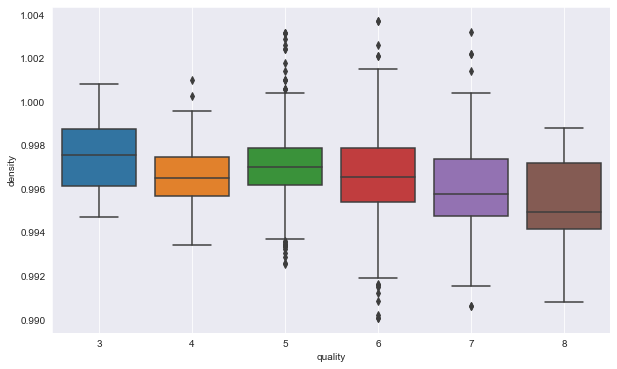

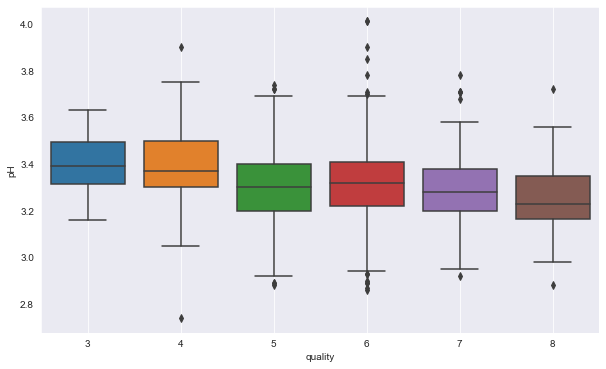

<Figure size 720x432 with 0 Axes>

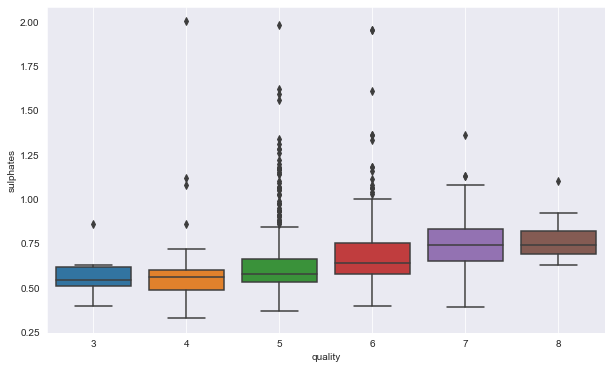

<Figure size 720x432 with 0 Axes>

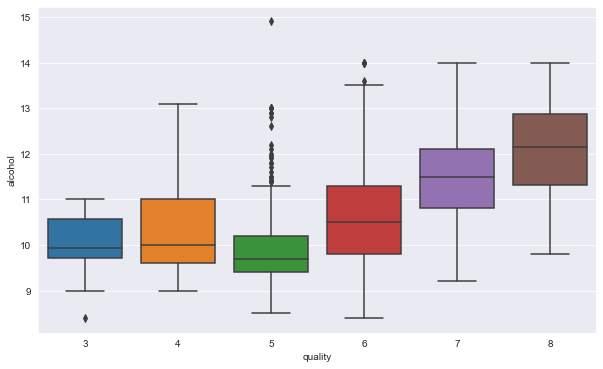

In [10]:
for i, col in enumerate(df.columns[:11]):
    plt.grid()
    plt.figure(figsize=(10,6))
    plt.figure(i)
    sns.boxplot(x='quality', y=col, data=df)

In [11]:
qua = df.groupby(['quality']).mean()

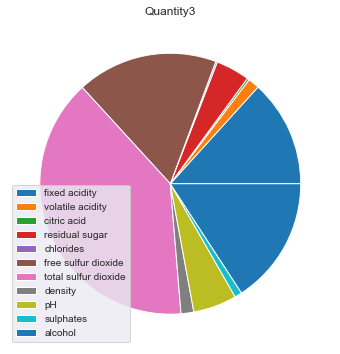

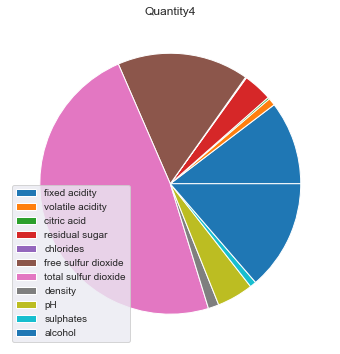

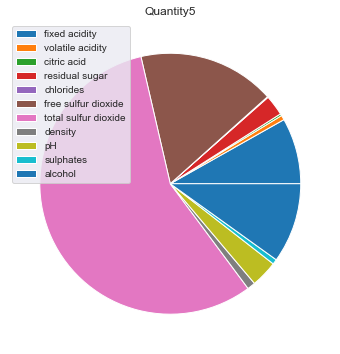

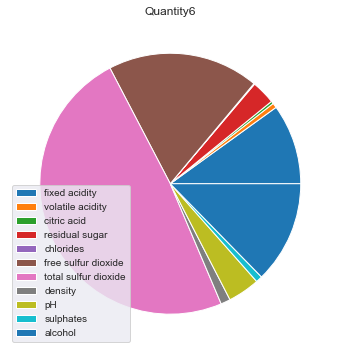

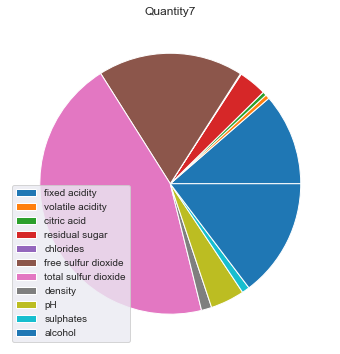

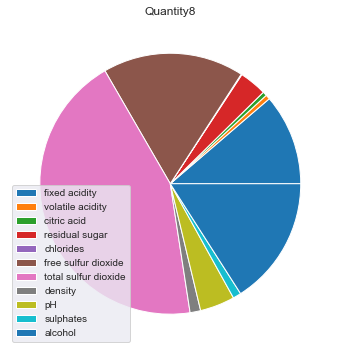

In [12]:
for i in range(6):
    plt.figure(figsize=(6,6))
    plt.pie(qua.iloc[i,:])
    plt.legend(labels = qua.columns,loc = 0,fontsize = 10)
    plt.title(f'Quantity{qua.index[i]}')
    plt.show()

In [13]:
# here the below code review the quality. i.e, 1-> bad  2-> good  3->v.good
reviews = []
for item in df['quality']:
    if item >=3 and item <5:
        reviews.append(1)
    elif item >=5 and item <7:
        reviews.append(2)
    else:
        reviews.append(3)

df['good'] = reviews

In [14]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2


In [15]:
df.good.value_counts()

2    1319
3     217
1      63
Name: good, dtype: int64

In [50]:
df.good.value_counts()

2    1319
3     217
1      63
Name: good, dtype: int64

# Machine Learning

### 1) KMeans
### 2) Decision Tree
### 3) Random Forest
### 4) k-nearest neighbor

In [56]:
X = df.drop(['quality', 'good'],axis=1)
y = df['quality']

## 1) KMeans

In [57]:
#Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [58]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_X = pd.DataFrame(pca.fit_transform(scaler_X),columns=['PCA1','PCA2'])

In [59]:
#KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(reduced_X)

KMeans(n_clusters=6)

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

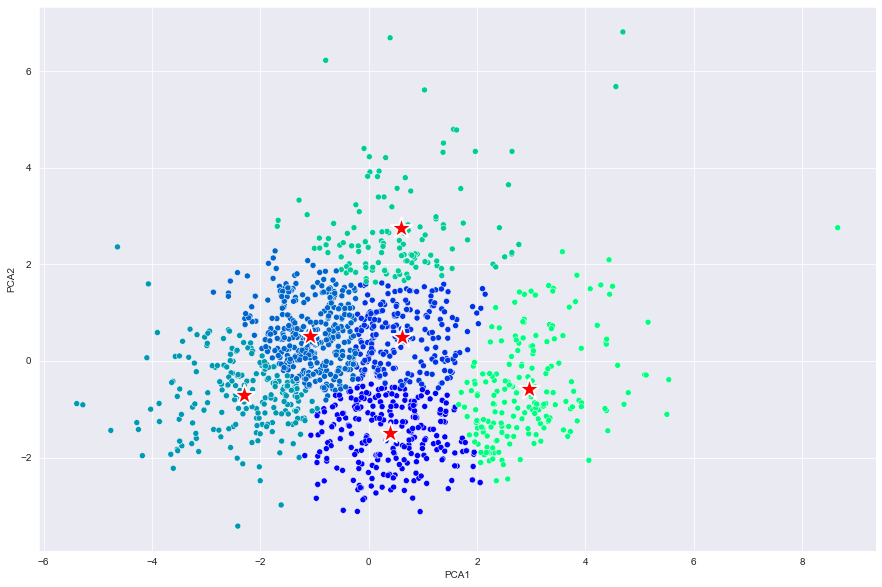

In [60]:
plt.figure(figsize=(15,10))
sns.scatterplot(x ='PCA1',y = 'PCA2',data=reduced_X,c = kmeans.labels_,cmap='winter')
sns.scatterplot(x = kmeans.cluster_centers_[:,0],y = kmeans.cluster_centers_[:,1], color = 'red',marker = '*', s = 500)

#### in the above graph ' * ' represents the centers of the clusters

### to get the best n_components value from PCA

In [23]:
X = df.drop(['quality', 'good'],axis=1)
y = df['good']

#Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

#PCA
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaler)

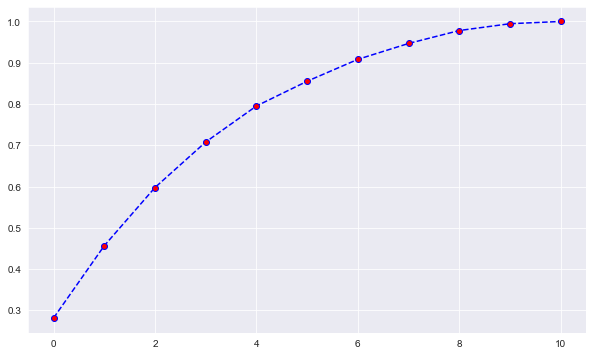

In [24]:
# graph to find the best value for principal components
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_),color = "blue", linestyle = "--",marker = 'o', markerfacecolor = 'red')

In [25]:
pca_updated = PCA(n_components=8)
X_pca_updated = pca_updated.fit_transform(X_scaler)

In [26]:
# pickle.dump(pca_updated, open('pca.sav', 'wb'))

In [27]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca_updated, y, test_size=0.15, random_state=100)
print(X_train.shape)
print(X_test.shape)

(1359, 8)
(240, 8)


In [28]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

## 2)Decision Tree

In [29]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
prediction = dtree.predict(X_test)
print(classification_report(y_test,prediction))
print('\n')
print(confusion_matrix(y_test,prediction))
print('\n')
print(f'Accuracy of the maodel is: {accuracy_score(y_test,prediction)*100} %')

              precision    recall  f1-score   support

           1       0.25      0.20      0.22        10
           2       0.93      0.85      0.89       204
           3       0.41      0.73      0.53        26

    accuracy                           0.81       240
   macro avg       0.53      0.59      0.55       240
weighted avg       0.85      0.81      0.82       240



[[  2   6   2]
 [  6 173  25]
 [  0   7  19]]


Accuracy of the maodel is: 80.83333333333333 %


## 3)Random Forest

In [70]:
X = df.drop(['quality', 'good'],axis=1)
y = df['good']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=100)

In [71]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
prediction = rfc.predict(X_test)
print(classification_report(y_test,prediction))
print('\n')
print(confusion_matrix(y_test,prediction))
print('\n')
print(f'Accuracy of the maodel is: {accuracy_score(y_test,prediction)*100} %')

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.93      0.96      0.95       204
           3       0.72      0.81      0.76        26

    accuracy                           0.90       240
   macro avg       0.55      0.59      0.57       240
weighted avg       0.87      0.90      0.89       240



[[  0   9   1]
 [  1 196   7]
 [  0   5  21]]


Accuracy of the maodel is: 90.41666666666667 %


In [73]:
# pickle.dump(rfc, open('rfc.sav', 'wb'))

## 4)K-Nearest Neighbors

#### finding the best value for k

In [34]:
# knn
from sklearn.neighbors import KNeighborsClassifier
err_lst = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predi = knn.predict(X_test)
    err_lst.append(np.mean(predi != y_test))

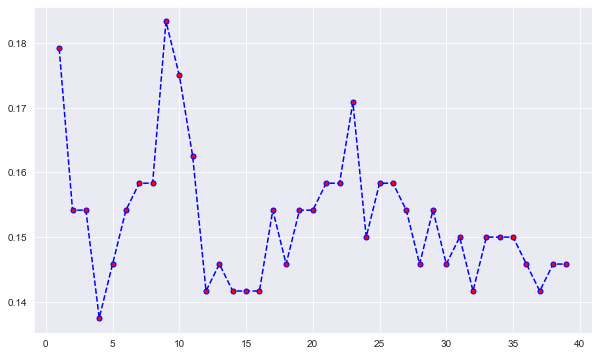

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),err_lst,color = 'blue',linestyle = '--',marker = '.',markerfacecolor='red',markersize=10)

#### from the above graph we can get the best value for k i.e., k = 4

In [36]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
print(classification_report(y_test,prediction))
print('\n')
print(confusion_matrix(y_test,prediction))
print('\n')
print(f'Accuracy of the maodel is: {accuracy_score(y_test,prediction)*100} %')

              precision    recall  f1-score   support

           1       0.50      0.10      0.17        10
           2       0.89      0.96      0.92       204
           3       0.55      0.42      0.48        26

    accuracy                           0.86       240
   macro avg       0.65      0.49      0.52       240
weighted avg       0.84      0.86      0.84       240



[[  1   8   1]
 [  1 195   8]
 [  0  15  11]]


Accuracy of the maodel is: 86.25 %


###                                                         Thank You